##### Import required modules and functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

##### Construct a dataframe from the image data, and an array of the target data

In [3]:
digits = load_digits()
data = pd.DataFrame(digits.data) # predictor data, each 8x8 px image is constructed from 64 numeric values
tar = digits.target # predicted data, the digit to be interpreted from each image
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


##### Split the data into training and testing sets

In [4]:
# split the data into training and testing sets; predictors are the pixel values, target output is the digit to be identified.
X_train, X_test, Y_train, Y_test = train_test_split(
    data,  # the complete dataframe
    tar,  # digit values to be predicted
    test_size=0.25,  # percentage of total samples to be allocated to the testing set
    random_state=16  # set a random seed to ensure results are reproducible
)

X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1093,0.0,0.0,0.0,7.0,11.0,0.0,0.0,0.0,0.0,0.0,...,14.0,2.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0
408,0.0,0.0,9.0,11.0,2.0,0.0,0.0,0.0,0.0,8.0,...,15.0,0.0,0.0,0.0,7.0,9.0,9.0,12.0,4.0,0.0
1519,0.0,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,1.0,8.0,16.0,15.0,2.0,0.0
1741,0.0,0.0,3.0,10.0,16.0,12.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,13.0,10.0,1.0,0.0,0.0
1611,0.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0.0,0.0,0.0,14.0,14.0,1.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,12.0,16.0,14.0,1.0,0.0
581,0.0,0.0,0.0,10.0,16.0,6.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,8.0,16.0,15.0,1.0,0.0
121,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,13.0,0.0,0.0,0.0
1262,0.0,2.0,14.0,16.0,16.0,7.0,0.0,0.0,0.0,6.0,...,2.0,0.0,0.0,1.0,14.0,16.0,16.0,6.0,0.0,0.0


##### Define the model parameters, train and test

In [5]:
model = SVC(  # set the parameters of the Support Vector Classifier
    kernel='rbf', 
    gamma='scale'
)

model.fit(X_train, Y_train)  # train the SVC model on the training data
print(model.score(X_test, Y_test) )  # returns the mean classification accuracy of the test data compared to the test target data
Y_pred = model.predict(X_test)

0.9933333333333333


In [6]:
# generate a dictionary of incorrect test predictions: {key : value} = {target digit : number of misclassifications}
miss = {i : np.bincount(Y_test[Y_pred != Y_test]).tolist()[i] for i in range(10) }
print(miss)

# return list of the digits which are most frequently misclassified
arr = []
for i in range(10):
    if miss[i] == max( [ t[1] for t in list(miss.items()) ] ):
        arr.append(i)
print(arr)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1}
[7, 8, 9]


##### Visualise the model's classification accuracy

Text(69.0, 0.5, 'Predicted')

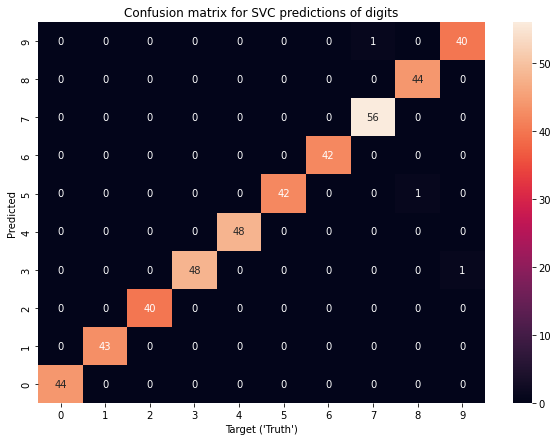

In [7]:
# generate a heatmap representation of the SVC confusion matrix
mpl.figure(figsize=(10,7))
hm = sb.heatmap(np.transpose(confusion_matrix(Y_test, Y_pred) ), annot=True)
hm.invert_yaxis()
mpl.title('Confusion matrix for SVC predictions of digits')
mpl.xlabel('Target (\'Truth\')')
mpl.ylabel('Predicted')